<center><h1>Linear Regression on Housing Price Dataset</h1></center>

**<center>Aditya Vallabh</center>**
**<center>IIT2016517</center>**

<h3>Problem</h3>

We are given a housing price dataset. Using various parameters in the datasets we
need to predict the housing price.

- Predict housing price using normal equations method.

- Predict housing price using gradient descent method.


**Requirements:**
- numpy
- pandas
- matplotlib

In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

Define cost functions and pre-process data by dropping 'yes/no' columns

In [73]:
def err(yy, y):
    diff = yy - y
    return np.sum(np.power(diff, 2))/(2*len(y))
    # return sum(np.abs(diff)/y)/len(y)

def pre_process(data, cols):
    # for col in cols:
    #     data.loc[data[col] == 'yes', [col]] = 1
    #     data.loc[data[col] == 'no', [col]] = 0
    data = data.drop(cols, axis=1)
    data = (data - data.mean())/data.std()
    return data

<h3>Normal Equation method</h3>

`W = (X.T * X)^-1 * (X.T * Y)`

Extend input dimensions to add bias terms

In [74]:
def train(x, y):
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    Y = np.array(y)

    XX = X.T.dot(X)
    XY = X.T.dot(Y)

    W = np.linalg.inv(XX).dot(XY)
    return W

<h3>Gradient Descent Method</h3>

In [75]:
def gradient_descent(x, y, w=None, epochs=20, learning_rate=1e-1):
    errs = []
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    if not w:
        w = np.zeros(X.shape[1])
    N = float(len(y))
    for i in range(epochs):
        y_current = (X.dot(w))
        errs.append(err(y_current, y))
        diff = y_current - y
        Z = (X.T.dot(diff))
        w_gradient = (1/N) * Z
        w -= (learning_rate * w_gradient)
    return w, errs

Predict the price given weights and features

In [76]:
def predict(x, W):
    X = np.ones((x.shape[0],x.shape[1]+1))
    X[:,1:] = x
    pred = []
    for t in X:
        pred.append(t.dot(W))
    return np.array(pred)

Read the dataset and pre-process by removing unecessary columns

In [77]:
data = pd.read_csv('dataset.csv', index_col=0)
# data = data.sample(50)
data = pre_process(data, ['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'])
x = data.loc[:, data.columns != 'price'].values
y = data['price'].values
data.head()

,price,lotsize,bedrooms,bathrms,stories,garagepl
1,-0.978239,0.322732,0.047192,-0.568973,0.221501,0.357239
2,-1.109312,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
3,-0.697368,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
4,-0.285425,0.691709,0.047192,-0.568973,0.221501,-0.803788
5,-0.266700,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


Obtain weights using both *normal equations* and *gradient descent* and plot the respective `cost vs epochs graphs`

In [78]:
W = train(x, y)
print('Normal Weights: {}\n'.format(W))
yy = predict(x, W)
norm_err = err(yy, y)
W2, errs = gradient_descent(x, y)
yy = predict(x, W2)
print('GD Weights: {}\n'.format(W2))
print('Normal Equations Cost: {}'.format(norm_err))
print('Gradient Descent Cost: {}'.format(err(yy, y)))


Normal Weights: [-9.65683950e-17  3.84337540e-01  6.59575210e-02  3.03672825e-01
  2.56189746e-01  1.73274748e-01]

GD Weights: [-1.63971401e-16  3.46505276e-01  1.11839214e-01  2.83568910e-01
  2.30761633e-01  1.87295155e-01]

Normal Equations Cost: 0.2189327289587085
Gradient Descent Cost: 0.22046766007923924


Almost similar weights are obtained for the same cost

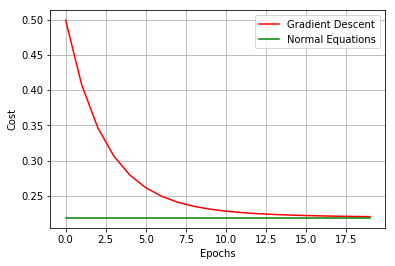

In [79]:
plt.plot(range(len(errs)), errs, '-r', label='Gradient Descent')
plt.plot(range(len(errs)), [norm_err]*len(errs), '-g', label='Normal Equations')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.grid()
plt.show()

***We observe that gradient descent takes time to converge and eventually matches the results of the normal equations***